# 關於視覺化與機器學習

我們先載入這個章節範例程式碼中會使用到的第三方套件、模組或者其中的部分類別、函式。

In [1]:
from IPython.display import YouTubeVideo
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## 一個資料科學專案

資料科學家面對的專案可能會包含下列這些工作內容：討論需求規格，取得測試資料、載入環境、整理資料、使用視覺化探索資料、利用機器學習模型預測資料、部署專案到正式環境到最後是將專案的洞察以淺顯易懂方式與組織內部其他團隊溝通及分享，而完成整個專案的最主要工具則是程式語言。本書專注於在使用視覺化探索資料、利用機器學習模型預測資料這兩階段。

![資料科學專案](01-introduction_01_0.png)

圖片來源：[R for Data Science](https://r4ds.had.co.nz/program-intro.html)

## 何謂視覺化

> I know having the data is not enough, I have to show it in a way that people both enjoy and understand.
>
> [Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling)

視覺化是致力於將抽象性概念具體化的學科，透過圖形中的大小、顏色或形狀等元素把原始資料、函式或方程式等所蘊含的特徵表達給瀏覽的人，進而將抽象的資訊轉換為溝通對象能快速掌握理解的精簡內容。我們日常工作中時常聽到的資訊圖表（Infographics）、商業智能（Business Intelligence）以及儀表板（Dashboard）都是視覺化的應用場景。

有效的視覺化具有資訊豐富卻能簡單理解的特性，我們可以從資料科學生態圈中為眾人朗朗上口的兩個經典案例：「拿破崙征俄戰爭」與「兩百年四分鐘」，感受他們如何將龐雜資訊轉換為易懂的視覺化。

1. 拿破崙征俄戰爭：法國土木工程師 [Charles Minard](https://en.wikipedia.org/wiki/Charles_Joseph_Minard) 使用一種前所未見的帶狀圖來描繪拿破崙的軍隊從波蘭前進至俄羅斯邊界在特定地理位置的軍隊規模，在一個圖形上涵蓋七個資料特徵：軍隊人數、行軍距離、溫度、經度、緯度、行進方向以及特定日期，讀者可以一目瞭然 1812 年征俄戰爭中拿破崙軍隊的慘烈戰況。這樣外觀的帶狀圖在後來被稱為 Sankey 圖，以發明者 [Matthew Henry Phineas Riall Sankey](https://en.wikipedia.org/wiki/Matthew_Henry_Phineas_Riall_Sankey) 作為命名，特別用來描述數量的流動與多寡。

![Charles Minard 的拿破崙征俄戰爭 Sankey 圖](01-introduction_01_1.png)

2. [兩百年四分鐘](https://www.youtube.com/watch?v=Z8t4k0Q8e8Y)：瑞典公衛教授 Hans Rosling 使用氣泡圖搭配動畫僅花費四分鐘和觀眾說明全世界超過兩百個國家在近兩百年中財富與健康程度的消長趨勢，在一個圖形上涵蓋五個資料特徵：人均國內生產總值、人均預期壽命、人口數、洲別、年份，觀眾可以一目暸然在綠能、和平、貿易與科技的助瀾下，長期世界國家的發展趨勢是往富裕且健康的方向前進。

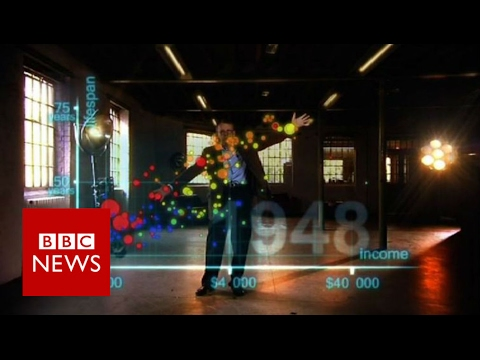

In [2]:
YouTubeVideo('Z8t4k0Q8e8Y', width=640, height=360)

## 為何視覺化

在日常面對抽象性概念（包含原始資料、函式或數學式）的時候，我們往往很難一眼就觀察出資料的特徵，因此利用視覺化協助探索性分析與成果溝通是極為有效的作法。接下來將針對原始資料、函式與數學式分別作圖，讀者可以比較視覺化前後的觀感與理解，藉此體驗為何在一個資料科學專案中視覺化是極為有效的工具。

### 原始資料

利用 `np.random.normal(size=10000)` 創建 10,000 筆符合標準常態分配的隨機數，假若單純將這些隨機數印出，幾乎不太能觀察出它們具備了標準常態分配這樣的特性。

In [3]:
arr = np.random.normal(size=10000)
arr

array([ 0.28763377, -0.12276065,  0.34811166, ...,  1.85008303,
       -0.05646011,  0.94117921])

若是將這些隨機數以直方圖（histogram）描繪，從鐘型外觀以及中心座落的位置，很快就觀察到它們具備了近似標準常態分配的特性（鐘型、以 0 為中心、約有 67% 的數值介於 -1 與 1 之間）。

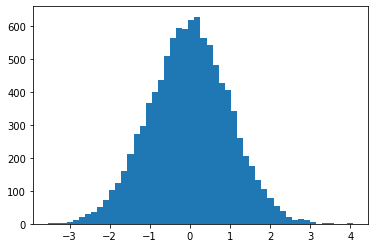

In [4]:
fig = plt.figure()
ax = plt.axes()
ax.hist(arr, bins=50)
plt.show()

### 函式

單純將使用 `np.linspace()` 與 `np.log()` 所創建的 $p$ 與 $-log(1-p)$、$-log(p)$ 印出，同樣也不太容易很快地觀察出這是其中一個描述對數損失的函式。對數損失函式在分類模型扮演重要的角色，後續章節會再細談。

In [5]:
eps = 1e-06 # epsilon, 一個很微小的數字避免 0 輸入 log 函式後產生無限大
p = np.linspace(0 + eps, 1 - eps, 10000)
log_loss_0 = -np.log(1-p)
log_loss_1 = -np.log(p)
print(p) 
print(log_loss_0)
print(log_loss_1)

[1.00000000e-06 1.01009801e-04 2.01019602e-04 ... 9.99798980e-01
 9.99898990e-01 9.99999000e-01]
[1.00000050e-06 1.01014903e-04 2.01039809e-04 ... 8.51210813e+00
 9.20029301e+00 1.38155106e+01]
[1.38155106e+01 9.20029301e+00 8.51210813e+00 ... 2.01039809e-04
 1.01014903e-04 1.00000050e-06]


若是將 $p$ 與 $-log(1-p)$、$-log(p)$ 以線圖（line）描繪，很快就能觀察到這個對數損失函式的設計是希望在 $y_{true} = 0$ 時當 $p$ 離 1 愈近的時候對數損失愈大，反之當 $p$ 離 0 愈近的時候對數損失愈小；在 $y_{true} = 1$ 時當 $p$ 離 0 愈近的時候對數損失愈大，反之當 $p$ 離 1 愈近的時候對數損失愈小；這樣的特性讓對數損失函式被用來二元分類的誤差函式。

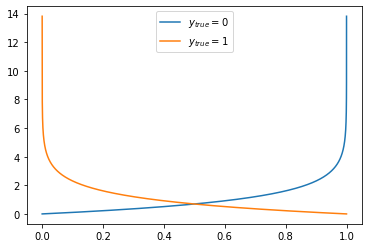

In [6]:
fig = plt.figure()
ax = plt.axes()
ax.plot(p, log_loss_0, label='$y_{true}=0$')
ax.plot(p, log_loss_1, label='$y_{true}=1$')
ax.legend()
plt.show()

### 數學式

以 Sigmoid 的數學式定義為例，單純撰寫出來同樣很難觀察輸入 $x$ 與輸出 $f(x)$ 的對應關係，Sigmoid 函式在分類模型同樣扮演重要的角色，在後續章節會再細談。

\begin{equation}
f(x) = \frac{1}{1+e^{-x}}
\end{equation}

若是將 $x$ 與 $f(x)$ 以線圖（line）描繪，很快就能觀察到 Sigmoid 函式能夠將介於正負無限大之間的輸入 $x$ 映射到 0 與 1 之間；因而被用來作為將迴歸模型的輸出轉換為機率延伸為分類模型的前置步驟。

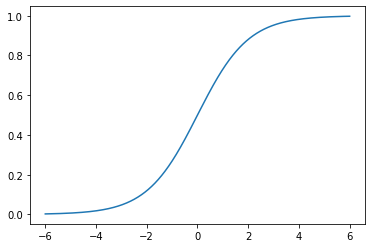

In [7]:
x = np.linspace(-6, 6, 1000)
fx = 1 / (1 + np.exp(-x))
fig = plt.figure()
ax = plt.axes()
ax.plot(x, fx)
plt.show()

從前述對原始資料、函式與數學式的視覺化前後比較，相信讀者已經能夠理解為何視覺化在資料科學專案中扮演如此吃重的角色。

## 何謂機器學習

> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E.
> 
> [Tom Mitchel](https://en.wikipedia.org/wiki/Tom_M._Mitchell)

機器學習是致力於透過歷史資料將預測或挖掘特徵能力內化於電腦程式的學科，透過 [Tom Mitchel](https://en.wikipedia.org/wiki/Tom_M._Mitchell) 精準的定義，一段具備預測數值、預測類別或挖掘特徵的電腦程式，也就是我們日常俗稱的「模型」，應該符合「三個要素」、「一個但書」的特性。其中，三個要素依序為資料（Experience）、任務（Task）與評估（Performance）；一個但書（Condition）則為隨著歷史資料觀測值數量增加，在其他條件不變前提下模型的表現應該要變得更優秀，也就是預測的誤差降低、挖掘資料特徵的能力提升。

機器學習的理念是**假設**有一個 $f$ 函式能夠完美描述特徵矩陣 $X$ 與目標向量 $y$ 的關係。

\begin{equation}
y = f(X)
\end{equation}

基於對 $f$ 的未知，我們從已經實現的歷史資料 $X^{(train)}$ 與 $y^{(train)}$ 之中找出 $h(X; w)$ 用來模擬 $f$。

\begin{equation}
\hat{y} = h(X; w)
\end{equation}

由於 $h(X; w)$ 有無限多種可能性，於是將根據 $y^{(train)}$ 與 $\hat{y}^{(train)}$ 的差異程度來決定如何從有限選擇範圍內的 $H$ 中，選擇差異程度最小的 $h^*(X; w)$。

\begin{equation}
H = \{h_1(X; w), h_2(X; w), ..., h_n(X; w)\}
\end{equation}

假若目標向量是連續的數值型態，選擇的依據是取能讓均方誤差最小的 $h^*(X; w)$，其中 $m$ 代表觀測值筆數。

\begin{equation}
Minimize \; \frac{1}{m}\sum_{i}{(y^{(train)}_i - \hat{y_i}^{(train)})^2}
\end{equation}

假若目標向量是離散的類別型態，選擇的依據是取能讓誤分類數總和最小的 $h^*(X; w)$。

\begin{equation}
Minimize \; \sum_{i} \mid y^{(train)}_i \neq \hat{y_i}^{(train)} \mid
\end{equation}

舉例來說，我們可以利用電腦程式對一組 NBA 籃球員的身高與體重資料進行學習，然後去對另外一組僅有身高資訊的 NBA 籃球員進行體重的預測。在這個簡短的例子中，任務（Task）是一組僅有身高資訊的 NBA 籃球員進行體重預測；資料（Experience）是另一組有身高以及體重資訊的 NBA 籃球員；評估（Performance）則是預測體重與真實體重的誤差，隨著資料筆數的增加，誤差會變得更小，那麼這個電腦程式就具備了機器學習的特性。

假如我們利用電腦程式對一組隨機生成的自然數與是否為質數的標籤資料進行學習，然後去對另外一組隨機生成但不具備標籤的資料進行是否為質數的預測，由於質數的判定可以用規則撰寫：只要該自然數的因數個數為 2 就是質數，在這樣的任務設定下評估永遠都是零誤差，不管用來學習的資料筆數增加多少，也不能再降低已經完美零誤差的評估，那麼這個電腦程式就「不具備」機器學習的特性。

機器學習粗分為監督式與非監督式學習，並再細分監督式學習成為迴歸以及分類：

- 監督式學習：訓練資料中具備已實現的數值或標籤
    - 迴歸：數值預測的任務
    - 分類：類別預測的任務
- 非監督式學習：訓練資料中「不」具備已實現的數值或標籤

## `pyvizml` 模組

在探討為何需要機器學習之前，我們需要先定義類別 `CreateNBAData` 協助演繹示例，這個類別主要的功能是由 [data.nba.net](https://data.nba.net/10s/prod/v1/today.json) 擷取資料；本書 `CreateNBAData` 類別會貫串全場，為了之後使用便利，將它用一個名為 `pyvizml` 的模組封裝起來，後續如果還要使用它，就可以用 `from MODULE import CLASS` 的指令載入。

```python
from pyvizml import CreateNBAData
```

其他在書中我們自行定義的類別，也都一併收錄在 `pyvizml` 模組中，在附錄 A 可以檢視每個自定義類別的完整程式碼。

In [8]:
class CreateNBAData:
    """
    This class scrapes NBA.com offical api: data.nba.net.
    See https://data.nba.net/10s/prod/v1/today.json
    Args:
        season_year (int): Use the first year to specify season, e.g. specify 2019 for the 2019-2020 season.
    """
    def __init__(self, season_year):
        self._season_year = str(season_year)

    def create_players_df(self):
        """
        This function returns the DataFrame of player information.
        """
        request_url = "https://data.nba.net/prod/v1/{}/players.json".format(self._season_year)
        resp_dict = requests.get(request_url).json()
        players_list = resp_dict['league']['standard']
        players_list_dict = []
        print("Creating players df...")
        for p in players_list:
            player_dict = {}
            for k, v in p.items():
                if isinstance(v, str) or isinstance(v, bool):
                    player_dict[k] = v
            players_list_dict.append(player_dict)
        df = pd.DataFrame(players_list_dict)
        filtered_df = df[(df['isActive']) & (df['heightMeters'] != '')]
        filtered_df = filtered_df.reset_index(drop=True)
        self._person_ids = filtered_df['personId'].values
        return filtered_df

    def create_stats_df(self):
        """
        This function returns the DataFrame of player career statistics.
        """
        self.create_players_df()
        career_summaries = []
        print("Creating player stats df...")
        for pid in self._person_ids:
            request_url = "https://data.nba.net/prod/v1/{}/players/{}_profile.json".format(self._season_year, pid)
            response = requests.get(request_url)
            profile_json = response.json()
            career_summary = profile_json['league']['standard']['stats']['careerSummary']
            career_summaries.append(career_summary)
        stats_df = pd.DataFrame(career_summaries)
        stats_df.insert(0, 'personId', self._person_ids)
        return stats_df
    
    def create_player_stats_df(self):
        """
        This function returns the DataFrame merged from players_df and stats_df.
        """
        players = self.create_players_df()
        stats = self.create_stats_df()
        player_stats = pd.merge(players, stats, left_on='personId', right_on='personId')
        return player_stats

`CreateNBAData` 需要傳入參數球季年份進行初始化，舉例我們要擷取的若是 2019-2020 球季，初始化類別就輸入 2019。這個類別定義了三個方法，`create_players_df()` 會回傳球員資料框、`create_stats_df()` 會回傳球員生涯攻守統計資料框、`create_player_stats_df()` 則會將球員資料框與球員生涯攻守統計資料框內部聯結（Inner join）後回傳。其中 `create_stats_df()` 與 `create_player_stats_df()` 兩個方法因為要對 [data.nba.net](https://data.nba.net/10s/prod/v1/today.json) 發出數百次的 HTTP 請求，等待時間會較長，要請讀者耐心等候。

In [9]:
cnd = CreateNBAData(2019)
player_stats = cnd.create_player_stats_df()

Creating players df...
Creating players df...
Creating player stats df...


## 為何機器學習

使用程式解決工作、學業上所遭遇的問題是很直觀的，通常是碰到必須大量且又要運作的事情，這時我們會透過程式提供的功能，包含迴圈、函式或類別，來撰寫規則實踐規模化與自動化，那麼在什麼特定場合需要運用機器學習呢？簡單來說，就是不容易用語言描述出來的邏輯、難以撰寫規則的數值預測或類別預測任務，我們舉出一些簡單的例子來說明哪些問題能用語言描述邏輯、撰寫規則，哪些問題不容易用語言描述邏輯、撰寫規則。

### 判斷質數

判斷一個正整數是否為質數有一個明確且能夠描述的邏輯：找出這個正整數所有的因數，假如個數為 2，亦即 1 與正整數自身，那麼就可以判斷為質數；反之如果所有因數的個數不為 2（1 個因數或者超過 2 個），那麼就判斷不為質數。假如解決問題的邏輯清晰且可以用語言描述，我們可以將這個邏輯想像成為一個函式 $f$，將問題輸入它就可以獲得解答 $f(x)$。

In [10]:
def f(x):
    """
    判斷輸入 x 是否為質數，是質數則輸出 1，否則輸出 0
    """
    n_divisors = 0
    for i in range(1, x+1):
        if x % i == 0:
            n_divisors += 1
        if n_divisors > 2:
            break
    return int(n_divisors == 2)
print(bool(f(1))) # 非質數
print(bool(f(2))) # 質數
print(bool(f(3))) # 質數

False
True
True


### 數值預測：球員的體重為何？

給定一位 NBA 球員的身高來預測他的體重，這個問題並沒有一個明確且能夠描述的邏輯，相反地，可能有為數甚多的手段來達成，例如用所有球員的平均 BMI 反推，或者以差不多身高的球員平均體重做為答案；這時我們想像有一個函式 $f$ 能夠完美解決問題，但是定義不出來，於是假設另一個函式 $h$ 和 $f$ 很相似但不盡相同，將問題輸入它可以獲得解答 $h(x)$，但由於 $h$ 畢竟不是 $f$，因此這個解答是有誤差的，而機器學習演算法的目標，就是盡可能讓誤差減小、讓 $h$ 愈加逼近 $f$。

In [11]:
X = player_stats['heightMeters'].values.reshape(-1, 1)
y = player_stats['weightKilograms'].values
lr = LinearRegression()
h = lr.fit(X, y)
print(h.predict(np.array([[1.90]]))[0]) # 預測身高 190 公分 NBA 球員的體重
print(h.predict(np.array([[1.98]]))[0]) # 預測身高 198 公分 NBA 球員的體重
print(h.predict(np.array([[2.03]]))[0]) # 預測身高 203 公分 NBA 球員的體重

89.89882199692715
97.66998879805146
102.52696804875413


### 類別預測：球員的鋒衛位置為何？

給定一位 NBA 球員的生涯場均助攻與場均籃板來預測他的鋒衛位置，這個問題同樣沒有一個明確且能夠描述的邏輯；我們同樣想像有一個函式 $f$ 能夠完美解決問題，但是定義不出來，於是假設另一個函式 $h$ 和 $f$ 很相似但不盡相同，將問題輸入它可以獲得解答 $h(x)$，但由於 $h$ 畢竟不是 $f$，因此這個解答是有誤差的。

In [12]:
unique_pos = player_stats['pos'].unique()
pos_dict = {i: p for i, p in enumerate(unique_pos)}
pos_dict_reversed = {v: k for k, v in pos_dict.items()}
print(pos_dict)
print(pos_dict_reversed)

{0: 'G', 1: 'C', 2: 'C-F', 3: 'F-C', 4: 'F', 5: 'F-G', 6: 'G-F'}
{'G': 0, 'C': 1, 'C-F': 2, 'F-C': 3, 'F': 4, 'F-G': 5, 'G-F': 6}


In [13]:
X = player_stats[['apg', 'rpg']].values
pos = player_stats['pos'].map(pos_dict_reversed)
y = pos.values
logit = LogisticRegression()
h = logit.fit(X, y)
print(pos_dict[h.predict(np.array([[5, 5]]))[0]]) # 預測場均助攻 5 場均籃板 5 的 NBA 球員鋒衛位置
print(pos_dict[h.predict(np.array([[5, 10]]))[0]]) # 預測場均助攻 5 場均籃板 10 的 NBA 球員鋒衛位置
print(pos_dict[h.predict(np.array([[5, 15]]))[0]]) # 預測場均助攻 5 場均籃板 15 的 NBA 球員鋒衛位置

G
F
C


經由前述判斷質數、數值預測和類別預測的簡單舉例，相信讀者已經能夠理解「能否」使用清晰且可以語言描述的邏輯作為判斷、預測準則，是資料科學專案是否採用機器學習方法的一個常見準則。

截至目前為止我們還沒有開始認識 NumPy、Matplotlib 或者 Scikit-Learn 套件，但是為了更妥善地說明，在範例程式碼中已經先引用了這些第三方套件所提供類別或函式，假如讀者目前對這些部分感到困惑，可待讀過數列運算、資料探索與機器學習入門等本書後面的章節，再回來複習。

## 延伸閱讀

1. Garrett Grolemund, Hadley Wickham: R for Data Science (https://r4ds.had.co.nz/)
2. Hans Rosling (https://en.wikipedia.org/wiki/Hans_Rosling)
3. Charles Minard (https://en.wikipedia.org/wiki/Charles_Joseph_Minard)
4. Matthew Henry Phineas Riall Sankey (https://en.wikipedia.org/wiki/Matthew_Henry_Phineas_Riall_Sankey)
5. Hans Rosling: 200 years in 4 minutes - BBC News (https://www.youtube.com/watch?v=Z8t4k0Q8e8Y)
6. Tom M. Mitchell (https://en.wikipedia.org/wiki/Tom_M._Mitchell)
7. Normal distribution (https://en.wikipedia.org/wiki/Normal_distribution)
8. data.nba.net (https://data.nba.net/10s/prod/v1/today.json)